In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Part A

In [ ]:
bins = [10, 20, 30, 40, 50, 60, 70] # binning (min = 18, max = 64)
df['age_group'] = pd.cut(df['age'], bins)
del df['age']
df.head()

,sex,bmi,children,smoker,region,charges,age_group
0,female,27.900,0,yes,southwest,16884.92400,"(10, 20]"
1,male,33.770,1,no,southeast,1725.55230,"(10, 20]"
2,male,33.000,3,no,southeast,4449.46200,"(20, 30]"
3,male,22.705,0,no,northwest,21984.47061,"(30, 40]"
4,male,28.880,0,no,northwest,3866.85520,"(30, 40]"


In [ ]:
label_encoder = LabelEncoder() # label encoder for ages
df['age_group'] = label_encoder.fit_transform(df['age_group'])
df.head()

,sex,bmi,children,smoker,region,charges,age_group
0,female,27.900,0,yes,southwest,16884.92400,0
1,male,33.770,1,no,southeast,1725.55230,0
2,male,33.000,3,no,southeast,4449.46200,1
3,male,22.705,0,no,northwest,21984.47061,2
4,male,28.880,0,no,northwest,3866.85520,2


In [ ]:
one_hot = pd.get_dummies(df['sex']) # one-hot encoding for sex
del df['sex']
df = df.join(one_hot)
df.head()

,bmi,children,smoker,region,charges,age_group,female,male
0,27.900,0,yes,southwest,16884.92400,0,1,0
1,33.770,1,no,southeast,1725.55230,0,0,1
2,33.000,3,no,southeast,4449.46200,1,0,1
3,22.705,0,no,northwest,21984.47061,2,0,1
4,28.880,0,no,northwest,3866.85520,2,0,1


In [ ]:
def normalization(col): # normalization function
  return (col - col.min()) / (col.max() - col.min())

In [ ]:
df['normalized BMI'] = normalization(df['bmi']) # normalize BMI
del df['bmi']
df.head()

,children,smoker,region,charges,age_group,female,male,normalized BMI
0,0,yes,southwest,16884.92400,0,1,0,0.321227
1,1,no,southeast,1725.55230,0,0,1,0.479150
2,3,no,southeast,4449.46200,1,0,1,0.458434
3,0,no,northwest,21984.47061,2,0,1,0.181464
4,0,no,northwest,3866.85520,2,0,1,0.347592


In [ ]:
change_smoke = {'yes': 1, 'no': 0} # separate smoker or not
df['Smoker'] = df['smoker'].map(change_smoke)
del df['smoker']
df['non-Smoker'] = 1 - df['Smoker']
df.head()

,children,region,charges,age_group,female,male,normalized BMI,Smoker,non-Smoker
0,0,southwest,16884.92400,0,1,0,0.321227,1,0
1,1,southeast,1725.55230,0,0,1,0.479150,0,1
2,3,southeast,4449.46200,1,0,1,0.458434,0,1
3,0,northwest,21984.47061,2,0,1,0.181464,0,1
4,0,northwest,3866.85520,2,0,1,0.347592,0,1


In [ ]:
one_hot = pd.get_dummies(df['region']) # one-hot encoding for region
del df['region']
df = df.join(one_hot)
df.head()

,children,charges,age_group,female,male,normalized BMI,Smoker,non-Smoker,northeast,northwest,southeast,southwest
0,0,16884.92400,0,1,0,0.321227,1,0,0,0,0,1
1,1,1725.55230,0,0,1,0.479150,0,1,0,0,1,0
2,3,4449.46200,1,0,1,0.458434,0,1,0,0,1,0
3,0,21984.47061,2,0,1,0.181464,0,1,0,1,0,0
4,0,3866.85520,2,0,1,0.347592,0,1,0,1,0,0


In [ ]:
chargs = df.pop('charges') # put charges in first column
df.insert(loc=0, column='charges', value=chargs)
df.head()

,charges,children,age_group,female,male,normalized BMI,Smoker,non-Smoker,northeast,northwest,southeast,southwest
0,16884.92400,0,0,1,0,0.321227,1,0,0,0,0,1
1,1725.55230,1,0,0,1,0.479150,0,1,0,0,1,0
2,4449.46200,3,1,0,1,0.458434,0,1,0,0,1,0
3,21984.47061,0,2,0,1,0.181464,0,1,0,1,0,0
4,3866.85520,0,2,0,1,0.347592,0,1,0,1,0,0


## Part B

In [ ]:
X = df.iloc[:, 1:]
Y = df['charges']

In [ ]:
def linear_reg(iter, learning_rate, x_train, y_train, coeff, printEachIter, toPrint): # linear regression
  cost_list = []
  for i in range(iter):
    predictions = np.dot(x_train, coeff)
    errors = predictions - y_train
    cost_list.append(((1/(2*x_train.shape[0])) * np.sum(errors**2)))
    gradient = x_train.T.dot(errors) / x_train.shape[0]
    coeff -= learning_rate * gradient

    if toPrint and (i % printEachIter == 0):
      print(f'Iteration: {i}, cost function: {cost_list[i]}')

  return cost_list, coeff

In [ ]:
learning_rate = 0.0001
iter = 10001
cost_each_test_size = []
test_sizes = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4] # find best test_size
for i in test_sizes:
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=i)
  x_train = np.c_[np.ones(x_train.shape[0]), x_train] # put 1 column (b)
  coeff = np.random.rand(x_train.shape[1]) # weigths of X
  cost_list , coeff = linear_reg(iter=iter, learning_rate=learning_rate, x_train=x_train, y_train=y_train, coeff=coeff, printEachIter=1000, toPrint=0)
  cost_each_test_size.append(cost_list[-1])

In [ ]:
index_bestTS = cost_each_test_size.index(min(cost_each_test_size))
best_test_size = test_sizes[index_bestTS]
print("Best test_size :", best_test_size)

Best test_size : 0.3


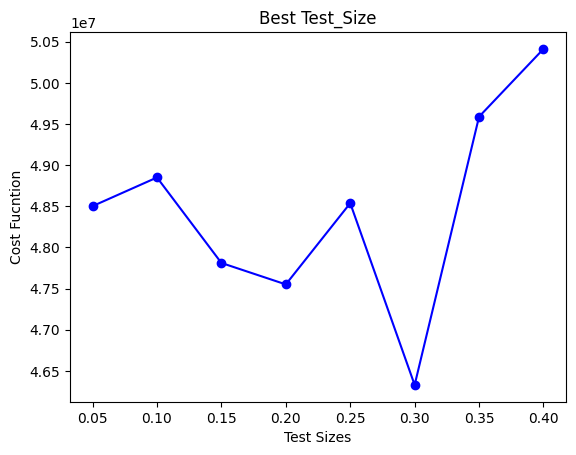

In [ ]:
plt.plot(test_sizes, cost_each_test_size, marker='o', color='b')
plt.title("Best Test_Size")
plt.xlabel("Test Sizes")
plt.ylabel("Cost Fucntion")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=best_test_size) # split test and train set based on best_test_size

## Part C

In [ ]:
x_train = np.c_[np.ones(x_train.shape[0]), x_train] # put 1 column (b)

In [ ]:
learning_rate = 0.0001
iter = 10001
coeff = np.random.rand(x_train.shape[1]) # weigths of X
print("Initial coefficients:")
print(coeff)

Initial coefficients:
[0.10206422 0.60903817 0.07248307 0.18669    0.27196066 0.46022731
 0.67151845 0.11599125 0.7185859  0.6864588  0.97437253 0.60808109]


In [ ]:
cost_list , coeff = linear_reg(iter=iter, learning_rate=learning_rate, x_train=x_train, y_train=y_train, coeff=coeff, printEachIter=1000, toPrint=1)

Iteration: 0, cost function: 169045913.24780798
Iteration: 1000, cost function: 82208964.4991566
Iteration: 2000, cost function: 69796477.748434
Iteration: 3000, cost function: 65855711.81923885
Iteration: 4000, cost function: 63018208.419615105
Iteration: 5000, cost function: 60451601.99631184
Iteration: 6000, cost function: 58053388.227377236
Iteration: 7000, cost function: 55803159.694909535
Iteration: 8000, cost function: 53690292.86824104
Iteration: 9000, cost function: 51705833.46236967
Iteration: 10000, cost function: 49841547.51437445


In [ ]:
print("Final coefficients:")
print(coeff)

Final coefficients:
[ 2040.58955704  1283.18578049  3390.82700429   737.34836862
  1303.59777485  1097.62519992  4022.59958687 -1981.32458435
   558.06885049   286.52137744   877.83167969   321.05308352]


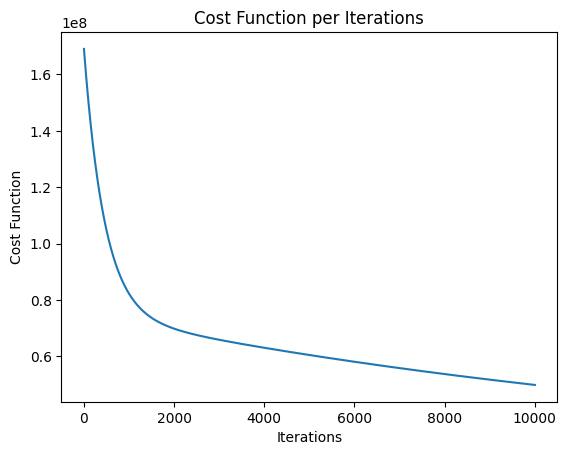

In [ ]:
plt.plot(range(iter), cost_list)
plt.title("Cost Function per Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.show()

In [ ]:
x_test = np.c_[np.ones(x_test.shape[0]), x_test] # put 1 column (b)

In [ ]:
y_pred = np.dot(x_test, coeff) # calculate y_pred

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 2)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 6624.21


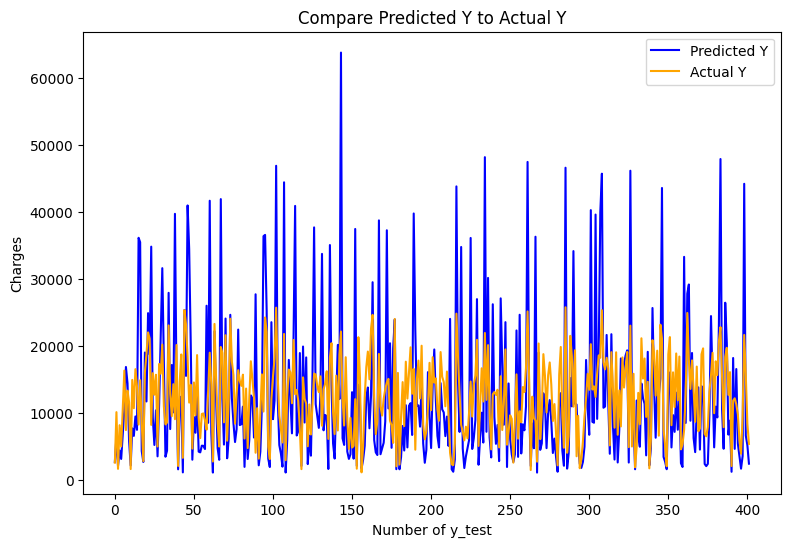

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label="Predicted Y") # values of y_test
plt.plot(range(len(y_test)), y_pred, color='orange', label="Actual Y") # values of y_pred
plt.title("Compare Predicted Y to Actual Y")
plt.xlabel("Number of y_test")
plt.ylabel("Charges")
plt.legend()
plt.show()

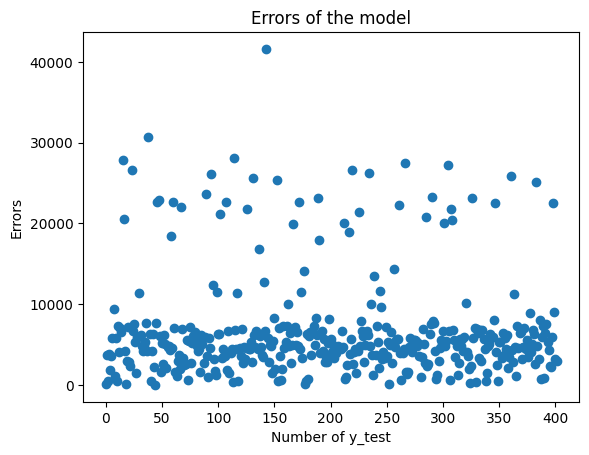

In [ ]:
error = abs(np.array(y_test) - np.array(y_pred))
plt.scatter(range(len(y_test)), error)
plt.title("Errors of the model")
plt.xlabel("Number of y_test")
plt.ylabel("Errors")
plt.show()

## Part D

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=best_test_size) # split train and test size based on best_test_size

In [ ]:
x_train = np.c_[np.ones(x_train.shape[0]), x_train, x_train**2, x_train**3] # put 1 column (b), x^2 and x^3

In [ ]:
coeff = np.random.rand(x_train.shape[1]) # weigths of X
print("Initial coefficients:")
print(coeff)

Initial coefficients:
[0.56886522 0.03577668 0.43231833 0.22680608 0.63701259 0.9897611
 0.93930479 0.45261886 0.29141514 0.83486055 0.65588308 0.06333592
 0.71693574 0.62303592 0.81013488 0.72875376 0.738581   0.04791217
 0.37254538 0.61046789 0.21272508 0.25032653 0.09414372 0.12786873
 0.9505428  0.10475406 0.2175712  0.46874444 0.46322712 0.60734663
 0.93333787 0.16492192 0.83108783 0.2368161 ]


In [ ]:
learning_rate = 0.0001
iter = 10001
cost_list = []
for i in range(iter):
  predictions = np.dot(x_train, coeff)
  errors = predictions - y_train
  cost_list.append(((1/(2*x_train.shape[0])) * np.sum(errors**2)))
  gradient = x_train.T.dot(errors) / x_train.shape[0]
  coeff -= learning_rate * gradient
  if i % 1000 == 0:
    print(f'Iteration: {i}, cost function: {cost_list[i]}')

Iteration: 0, cost function: 155209220.2829905
Iteration: 1000, cost function: 67493902.00925133
Iteration: 2000, cost function: 57235069.6769564
Iteration: 3000, cost function: 50797689.59789844
Iteration: 4000, cost function: 45894446.63306251
Iteration: 5000, cost function: 41883846.05648165
Iteration: 6000, cost function: 38526358.873677045
Iteration: 7000, cost function: 35692153.62748182
Iteration: 8000, cost function: 33290142.220075816
Iteration: 9000, cost function: 31248972.599316966
Iteration: 10000, cost function: 29510584.13378105


In [ ]:
print("Final coefficients:")
print(coeff)

Final coefficients:
[ 1529.79936322   727.14217773  1167.12670555   686.37767369
   843.71664299   848.37408572  2936.54615729 -1405.92373564
   371.27628812   304.70826434   591.94745199   263.14398823
   703.63925437  1145.45718344   686.96100249   843.80838415
   471.83279936  2935.65476466 -1406.00380912   371.59534087
   304.08612887   591.54189544   263.17479603  -169.52407937
  -155.20281605   686.25562166   843.29720159   270.97912532
  2936.07007961 -1405.76900787   371.91821086   304.03832571
   592.12265673   263.31746841]


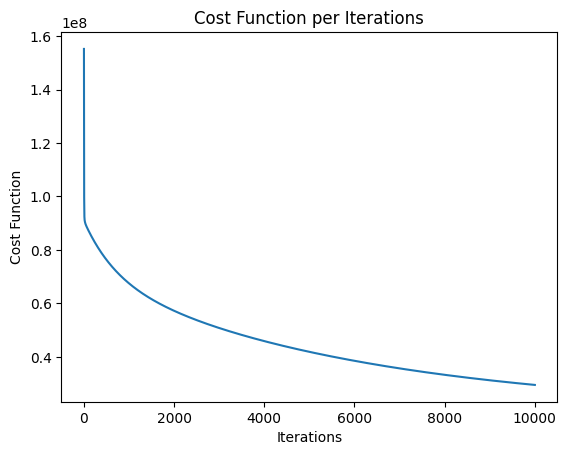

In [ ]:
plt.plot(range(iter), cost_list)
plt.title("Cost Function per Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.show()

In [ ]:
x_test = np.c_[np.ones(x_test.shape[0]),  x_test, x_test**2, x_test**3] # put 1 column (b), x^2 and x^3

In [ ]:
y_pred = np.dot(x_test, coeff) # calculate y_pred

In [ ]:
mae = round(mean_absolute_error(y_test, y_pred), 2)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 5534.44


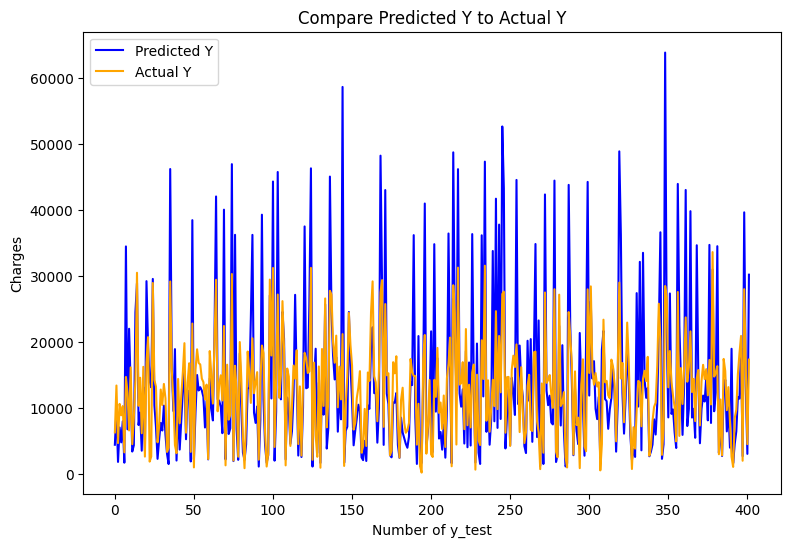

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label="Predicted Y") # values of y_test
plt.plot(range(len(y_test)), y_pred, color='orange', label="Actual Y") # values of y_pred
plt.title("Compare Predicted Y to Actual Y")
plt.xlabel("Number of y_test")
plt.ylabel("Charges")
plt.legend()
plt.show()

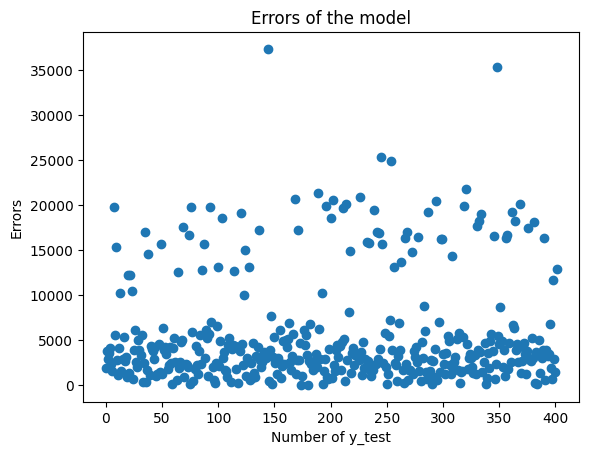

In [ ]:
error = abs(np.array(y_test) - np.array(y_pred))
plt.scatter(range(len(y_test)), error)
plt.title("Errors of the model")
plt.xlabel("Number of y_test")
plt.ylabel("Errors")
plt.show()